# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_csv/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities


['kavieng',
 'tapaua',
 'saleaula',
 'constitucion',
 'tuatapere',
 'bengkulu',
 'puerto ayora',
 'hermanus',
 'iquique',
 'busselton',
 'abu dhabi',
 'vardo',
 'sabang',
 'charagua',
 'port alfred',
 'lompoc',
 'kirakira',
 'new norfolk',
 'barentsburg',
 'barrow',
 'cheremkhovo',
 'olafsvik',
 'hobart',
 'senanga',
 'rocha',
 'alta floresta',
 'rikitea',
 'ancud',
 'kapaa',
 'todos santos',
 'hithadhoo',
 'dikson',
 'tiksi',
 'longlac',
 'duluth',
 'khandyga',
 'illoqqortoormiut',
 'ucluelet',
 'mataura',
 'bluff',
 'sentyabrskiy',
 'jamestown',
 'jian',
 'goderich',
 'port-gentil',
 'saint-philippe',
 'krasnoarmeysk',
 'akdepe',
 'hai phong',
 'chapais',
 'mandalgovi',
 'lebu',
 'taolanaro',
 'tumannyy',
 'lagoa',
 'butaritari',
 'mizdah',
 'ushuaia',
 'bambous virieux',
 'attawapiskat',
 'hamilton',
 'torbay',
 'morehead',
 'saskylakh',
 'evensk',
 'winnemucca',
 'saldanha',
 'champerico',
 'acahay',
 'padang',
 'mumford',
 'khatanga',
 'faanui',
 'oriximina',
 'carnarvon',
 'rimbe

In [7]:
print(len(cities))

608


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#url - found on https://openweathermap.org/current
url = "http://api.openweathermap.org/data/2.5/weather?"

#create lists
city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Set loop
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        long.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        cloudiness.append(response["clouds"])
        
        print(f"Processing record {i}|{city}")
        i+=1
        
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|kavieng
City not found. skipping.
City not found. skipping.
Processing record 2|constitucion
Processing record 3|tuatapere
Processing record 4|bengkulu
Processing record 5|puerto ayora
Processing record 6|hermanus
Processing record 7|iquique
Processing record 8|busselton
Processing record 9|abu dhabi
Processing record 10|vardo
Processing record 11|sabang
Processing record 12|charagua
Processing record 13|port alfred
Processing record 14|lompoc
Processing record 15|kirakira
Processing record 16|new norfolk
City not found. skipping.
Processing record 17|barrow
Processing record 18|cheremkhovo
Processing record 19|olafsvik
Processing record 20|hobart
Processing record 21|senanga
Processing record 22|rocha
Processing record 23|alta floresta
Processing record 24|rikitea
Processing record 25|ancud
Processing record 26|kapaa
Processing record 27|todos santos
Processing record 28|hithadhoo
Processing record 29|dikson
Processing record 30|tiksi
City not found. skipping.
Proc

Processing record 245|dingli
Processing record 246|tomatlan
Processing record 247|requena
Processing record 248|lorengau
Processing record 249|dauphin
Processing record 250|port macquarie
Processing record 251|palasa
Processing record 252|marsh harbour
Processing record 253|nizwa
Processing record 254|erenhot
Processing record 255|victoria
Processing record 256|margate
Processing record 257|puerto baquerizo moreno
Processing record 258|esperance
Processing record 259|christchurch
Processing record 260|shugurovo
Processing record 261|san felipe
Processing record 262|alot
Processing record 263|zorritos
Processing record 264|turtas
Processing record 265|kurchum
Processing record 266|edd
Processing record 267|meulaboh
Processing record 268|atambua
Processing record 269|geraldton
City not found. skipping.
Processing record 270|shimoda
Processing record 271|polunochnoye
Processing record 272|axim
Processing record 273|saint-augustin
City not found. skipping.
Processing record 274|ouadda
Proc

Processing record 488|malatya
Processing record 489|northam
Processing record 490|palauig
Processing record 491|sunndalsora
Processing record 492|karasburg
Processing record 493|pacific grove
Processing record 494|saint-leu
Processing record 495|mikun
Processing record 496|molteno
Processing record 497|lakes entrance
Processing record 498|omboue
Processing record 499|uthal
Processing record 500|san rafael
Processing record 501|roros
Processing record 502|rawson
Processing record 503|lingao
Processing record 504|kaeo
Processing record 505|topolobampo
Processing record 506|indiaroba
Processing record 507|maragogi
Processing record 508|makakilo city
Processing record 509|kenai
Processing record 510|hasaki
Processing record 511|aswan
Processing record 512|ibra
Processing record 513|novo aripuana
Processing record 514|codrington
Processing record 515|chuy
Processing record 516|manggar
Processing record 517|rahatgarh
Processing record 518|salta
Processing record 519|port hedland
Processing r

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Create Dataframe


weather_df = {
    "City":city_name,
    "Lat":lat,
    "Long":long,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date,
}


#Display DF
weather_df =pd.DataFrame(weather_df)
weather_df.head()



,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavieng,-2.5744,150.7967,299.20,81,{'all': 100},1.40,PG,1633526457
1,Constitución,-35.3333,-72.4167,285.99,48,{'all': 0},1.41,CL,1633526156
2,Tuatapere,-46.1333,167.6833,284.72,96,{'all': 25},1.36,NZ,1633526585
3,Bengkulu,-3.8004,102.2655,297.92,88,{'all': 40},2.43,ID,1633526457
4,Puerto Ayora,-0.7393,-90.3518,292.34,98,{'all': 94},3.13,EC,1633526450


In [9]:
weather_df= weather_df.rename_axis('City ID')

#Exporting data to csv
weather_df.to_csv("output_csv/city.csv")

In [10]:
humidity

[81,
 48,
 96,
 88,
 98,
 51,
 63,
 69,
 62,
 66,
 77,
 43,
 74,
 92,
 84,
 67,
 86,
 61,
 69,
 72,
 23,
 63,
 66,
 80,
 57,
 81,
 64,
 74,
 98,
 86,
 97,
 96,
 91,
 98,
 93,
 91,
 51,
 82,
 74,
 85,
 38,
 20,
 82,
 46,
 53,
 89,
 71,
 18,
 70,
 88,
 90,
 71,
 97,
 97,
 55,
 39,
 56,
 84,
 75,
 83,
 76,
 98,
 65,
 47,
 68,
 54,
 61,
 63,
 53,
 93,
 22,
 66,
 98,
 89,
 94,
 39,
 96,
 82,
 18,
 73,
 58,
 100,
 81,
 90,
 66,
 65,
 100,
 88,
 68,
 76,
 72,
 75,
 88,
 83,
 36,
 77,
 82,
 80,
 76,
 28,
 93,
 63,
 92,
 56,
 69,
 63,
 73,
 32,
 58,
 49,
 89,
 88,
 43,
 86,
 100,
 63,
 93,
 97,
 71,
 88,
 60,
 67,
 52,
 84,
 55,
 93,
 65,
 42,
 60,
 36,
 83,
 39,
 82,
 83,
 67,
 73,
 76,
 88,
 49,
 77,
 89,
 68,
 37,
 100,
 38,
 81,
 77,
 96,
 97,
 36,
 71,
 77,
 73,
 83,
 55,
 67,
 81,
 79,
 50,
 92,
 38,
 29,
 87,
 79,
 66,
 85,
 85,
 80,
 36,
 97,
 63,
 88,
 23,
 60,
 42,
 75,
 61,
 15,
 77,
 10,
 46,
 86,
 65,
 90,
 42,
 93,
 80,
 70,
 60,
 94,
 80,
 79,
 64,
 70,
 17,
 87,
 97,
 68,
 9,
 8

In [11]:

print("After inspecting the data, the maximum humidity value is 100%, therefore there are no values greater than 100% in our data")


After inspecting the data, the maximum humidity value is 100%, therefore there are no values greater than 100% in our data


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

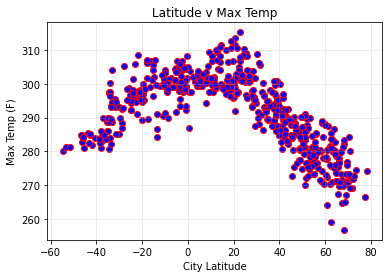

In [24]:
#Create Scatter plot for Latitude v Temp
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "blue", edgecolor = "red")

#Title
plt.title ("Latitude v Max Temp")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Max Temp (F)")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Max Temp.png")
           
    

## Latitude vs. Humidity Plot

In [ ]:
#Create Scatter plot for Latitude v Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidi"], facecolor = "lightblue", edgecolor = "black")

#Title
plt.title ("Latitude v Max Temp")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Max Temp (F)")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Max Temp.png")

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression